In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [4]:
train_df.shape

(1235, 29)

In [5]:
test_df.shape

(824, 28)

In [6]:
train_df.replace('None', np.NaN, inplace = True)

In [7]:
train_df.drop(columns = ['id'], inplace = True)
test_id = test_df['id']
test_df.drop(columns = ['id'], inplace = True)

In [8]:
def get_summary(df):
    summary = pd.DataFrame()
    summary['dtypes'] = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary['missing'] = df.isna().sum()
    summary['%missing'] = df.isna().sum() / len(df)
    summary['nunique'] = df.nunique()
    summary['Count'] = df.count().values
    return summary
summary_train = get_summary(train_df).style.background_gradient(cmap = 'Blues')
summary_train

,dtypes,missing,%missing,nunique,Count
surgery,object,0,0.000000,2,1235
age,object,0,0.000000,2,1235
hospital_number,int64,0,0.000000,255,1235
rectal_temp,float64,0,0.000000,43,1235
pulse,float64,0,0.000000,50,1235
respiratory_rate,float64,0,0.000000,37,1235
temp_of_extremities,object,39,0.031579,4,1196
peripheral_pulse,object,60,0.048583,4,1175
mucous_membrane,object,21,0.017004,6,1214
capillary_refill_time,object,6,0.004858,3,1229


In [9]:
test_df.replace('None', np.NaN, inplace = True)
summary_test = get_summary(test_df).style.background_gradient(cmap = 'Blues')
summary_test

,dtypes,missing,%missing,nunique,Count
surgery,object,0,0.000000,2,824
age,object,0,0.000000,2,824
hospital_number,int64,0,0.000000,210,824
rectal_temp,float64,0,0.000000,34,824
pulse,float64,0,0.000000,49,824
respiratory_rate,float64,0,0.000000,38,824
temp_of_extremities,object,35,0.042476,4,789
peripheral_pulse,object,47,0.057039,4,777
mucous_membrane,object,13,0.015777,6,811
capillary_refill_time,object,6,0.007282,3,818


In [10]:
numeric_columns = train_df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
categorical_columns = train_df.select_dtypes(include = ['object']).columns.tolist()
numeric_columns.remove('lesion_2')
numeric_columns.remove('lesion_3')
numeric_columns

['hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1']

In [11]:
categorical_columns.extend(['lesion_2', 'lesion_3'])
categorical_columns

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data',
 'outcome',
 'lesion_2',
 'lesion_3']

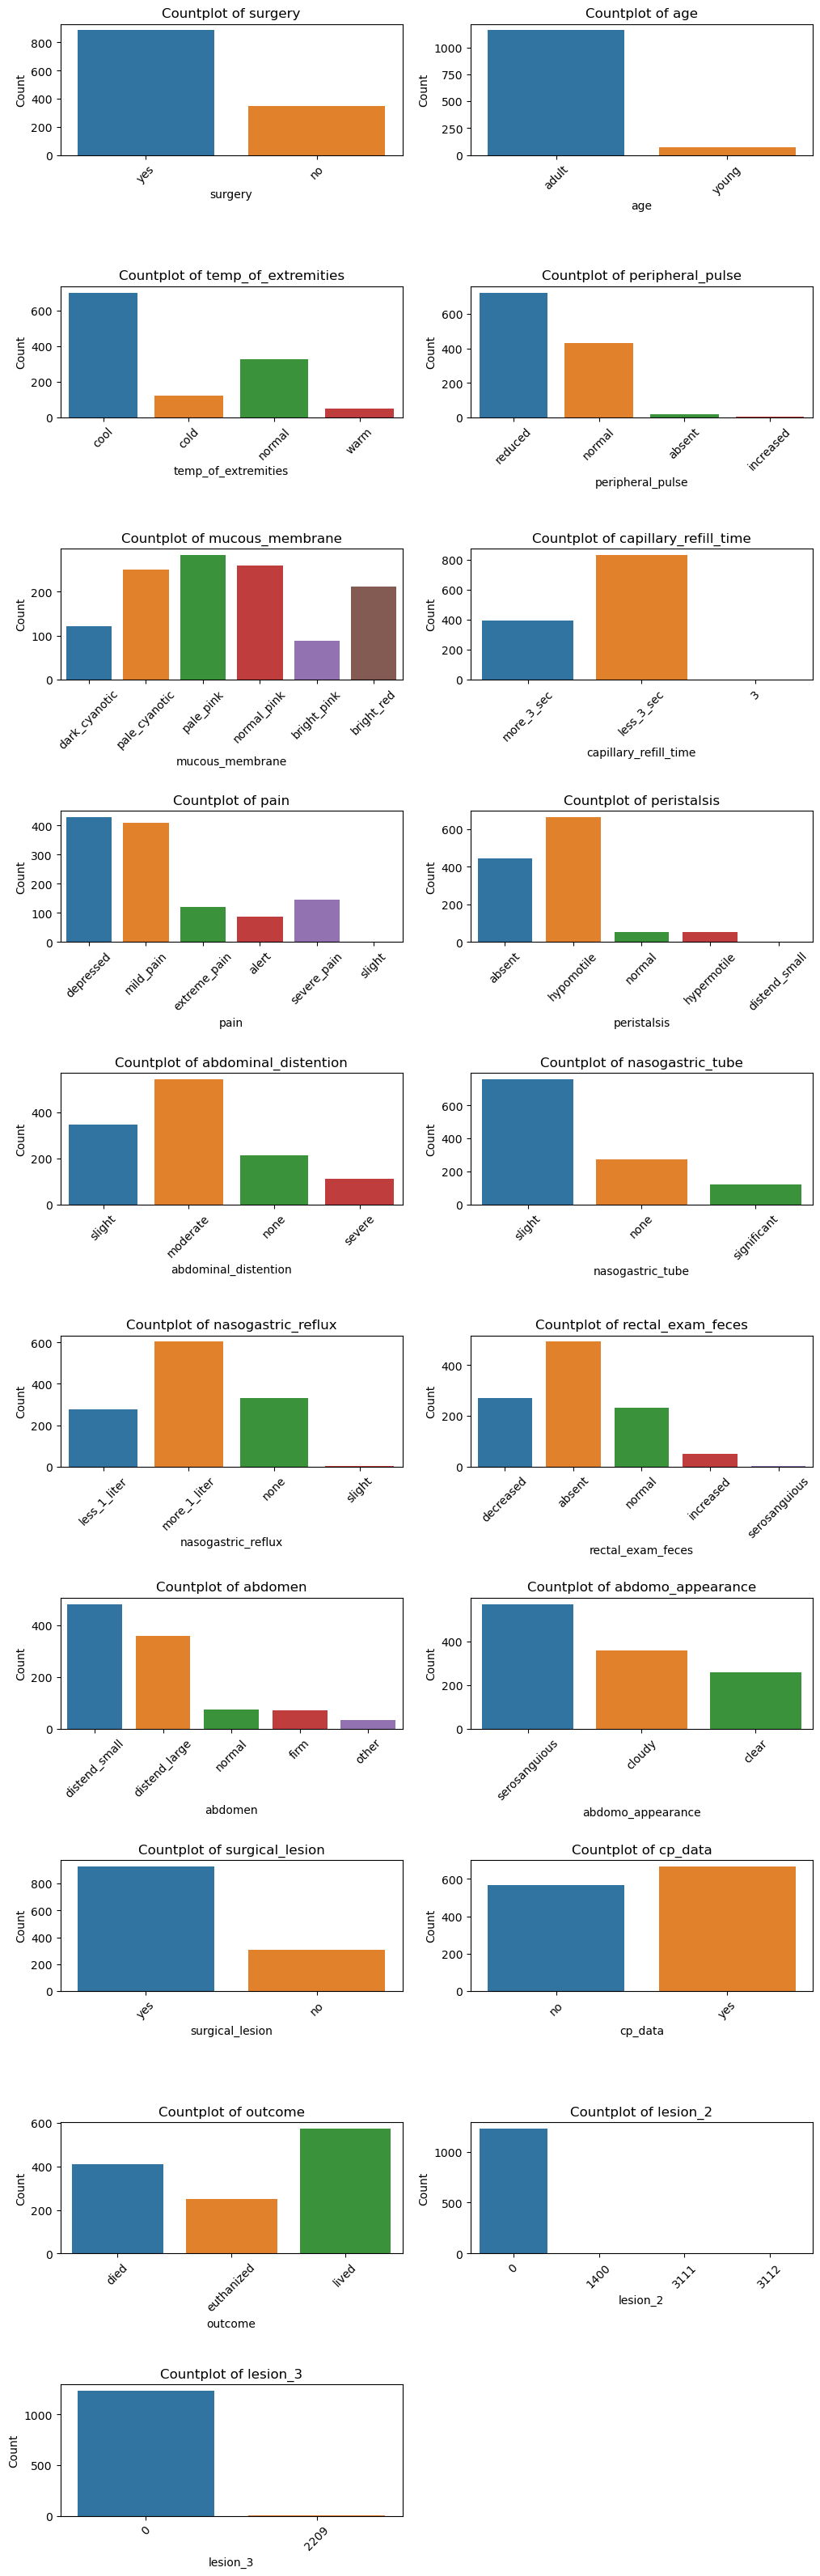

In [12]:
columns_per_row = 2
num_rows = len(categorical_columns) // columns_per_row
if len(categorical_columns) % columns_per_row != 0:
    num_rows += 1
fig, axes = plt.subplots(num_rows, columns_per_row, figsize = (12, 4 * num_rows))
fig.subplots_adjust(hspace = 1.0)
for i, column in enumerate(categorical_columns):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]
    sns.countplot(data = train_df, x = column, ax = ax)
    ax.set_title('Countplot of {}'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis = 'x', rotation = 45)

for i in range(len(categorical_columns), num_rows * columns_per_row):
    fig.delaxes(axes.flatten()[i])
plt.show()

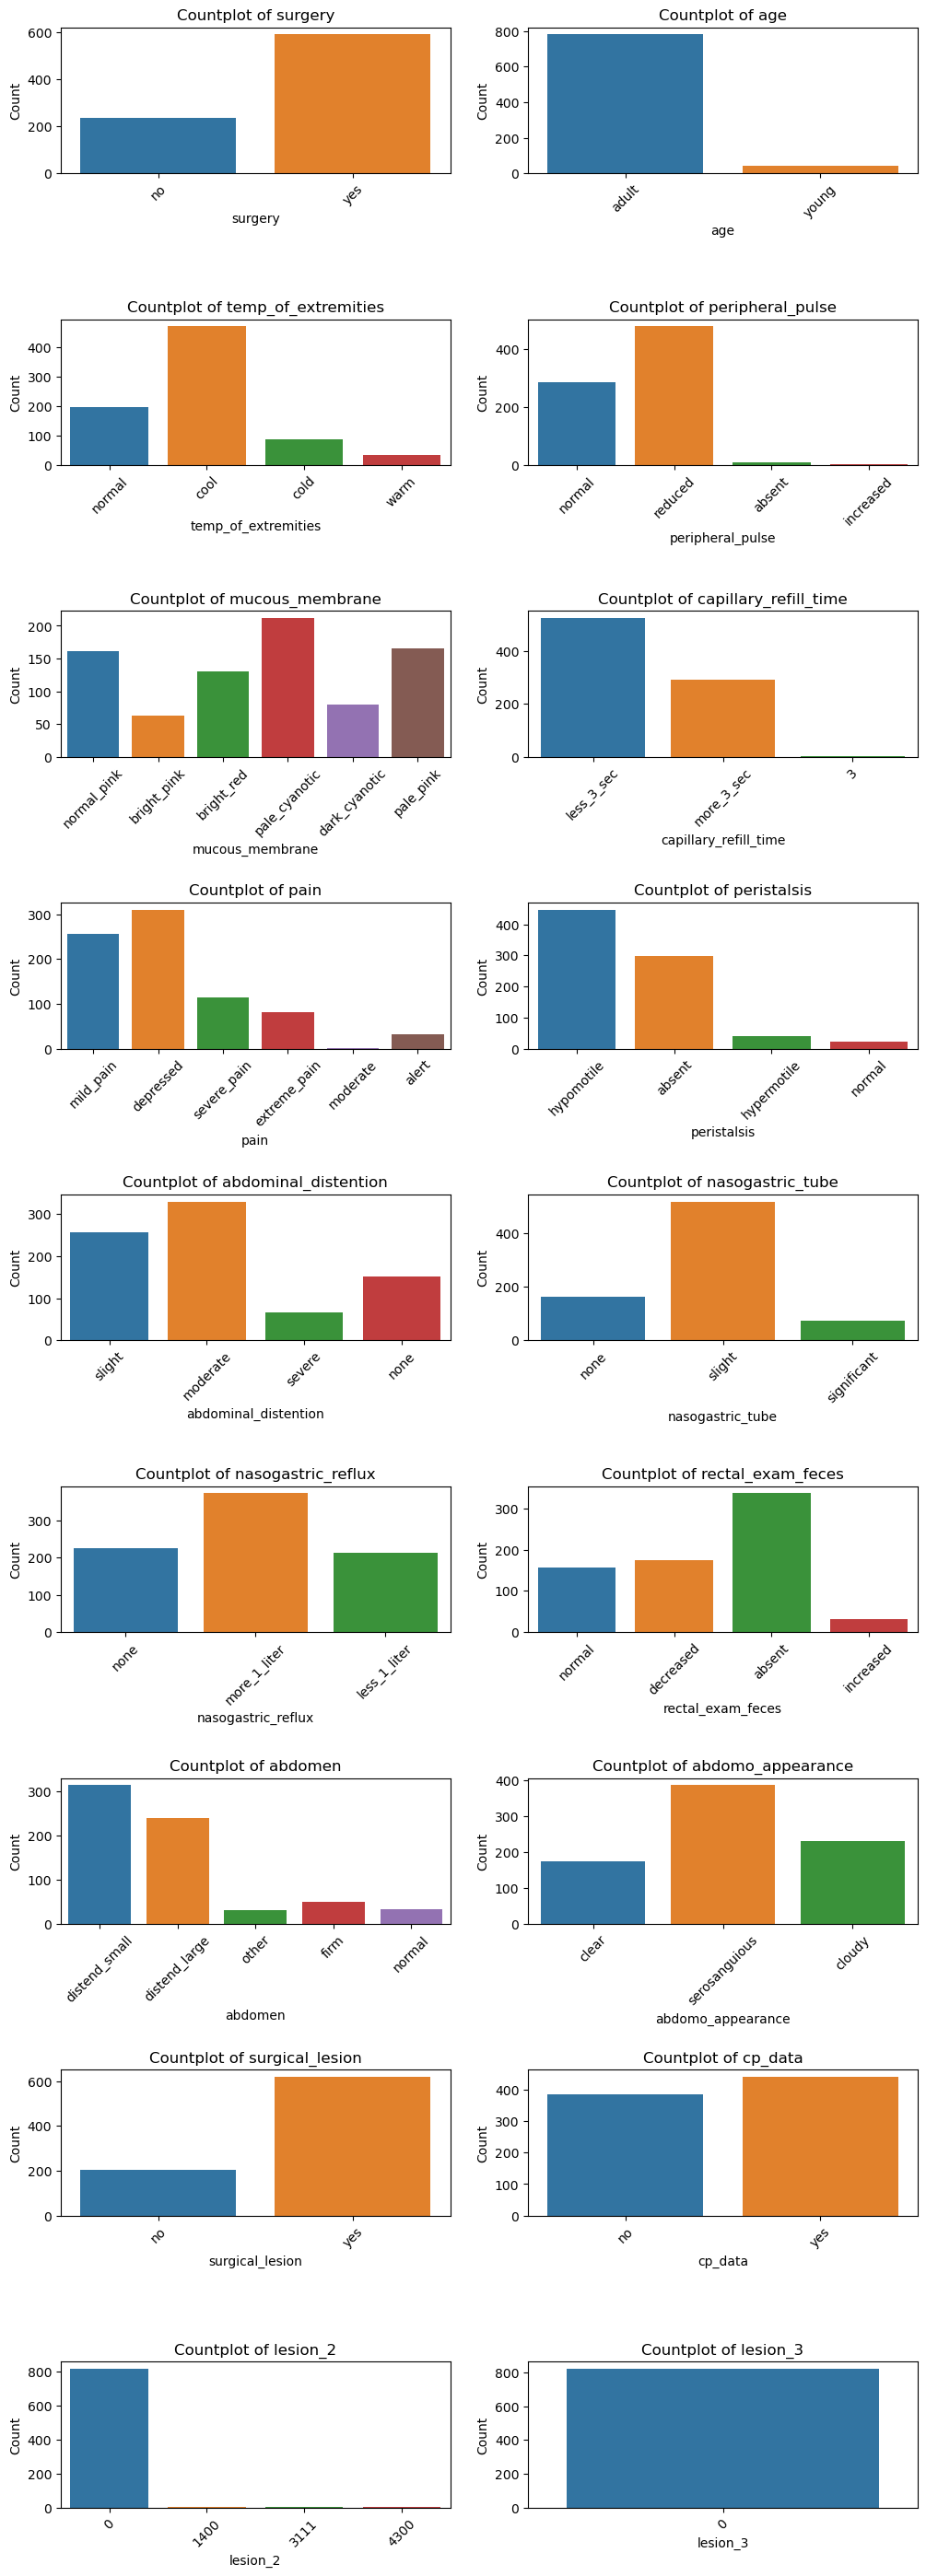

In [13]:
columns_per_row = 2
categorical_columns_test = test_df.select_dtypes(include = ['object']).columns.tolist()
categorical_columns_test.extend(['lesion_2', 'lesion_3'])
num_rows = len(categorical_columns_test)
if num_rows % columns_per_row != 0:
    num_rows += 1
fig, axes = plt.subplots(num_rows, columns_per_row, figsize = (12, 4 * num_rows))
fig.subplots_adjust(hspace = 1.0)
for i, column in enumerate(categorical_columns_test):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]
    sns.countplot(data = test_df, x = column, ax = ax)
    ax.set_title('Countplot of {}'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis = 'x', rotation = 45)

for i in range(len(categorical_columns_test), num_rows * columns_per_row):
    fig.delaxes(axes.flatten()[i])

plt.show()

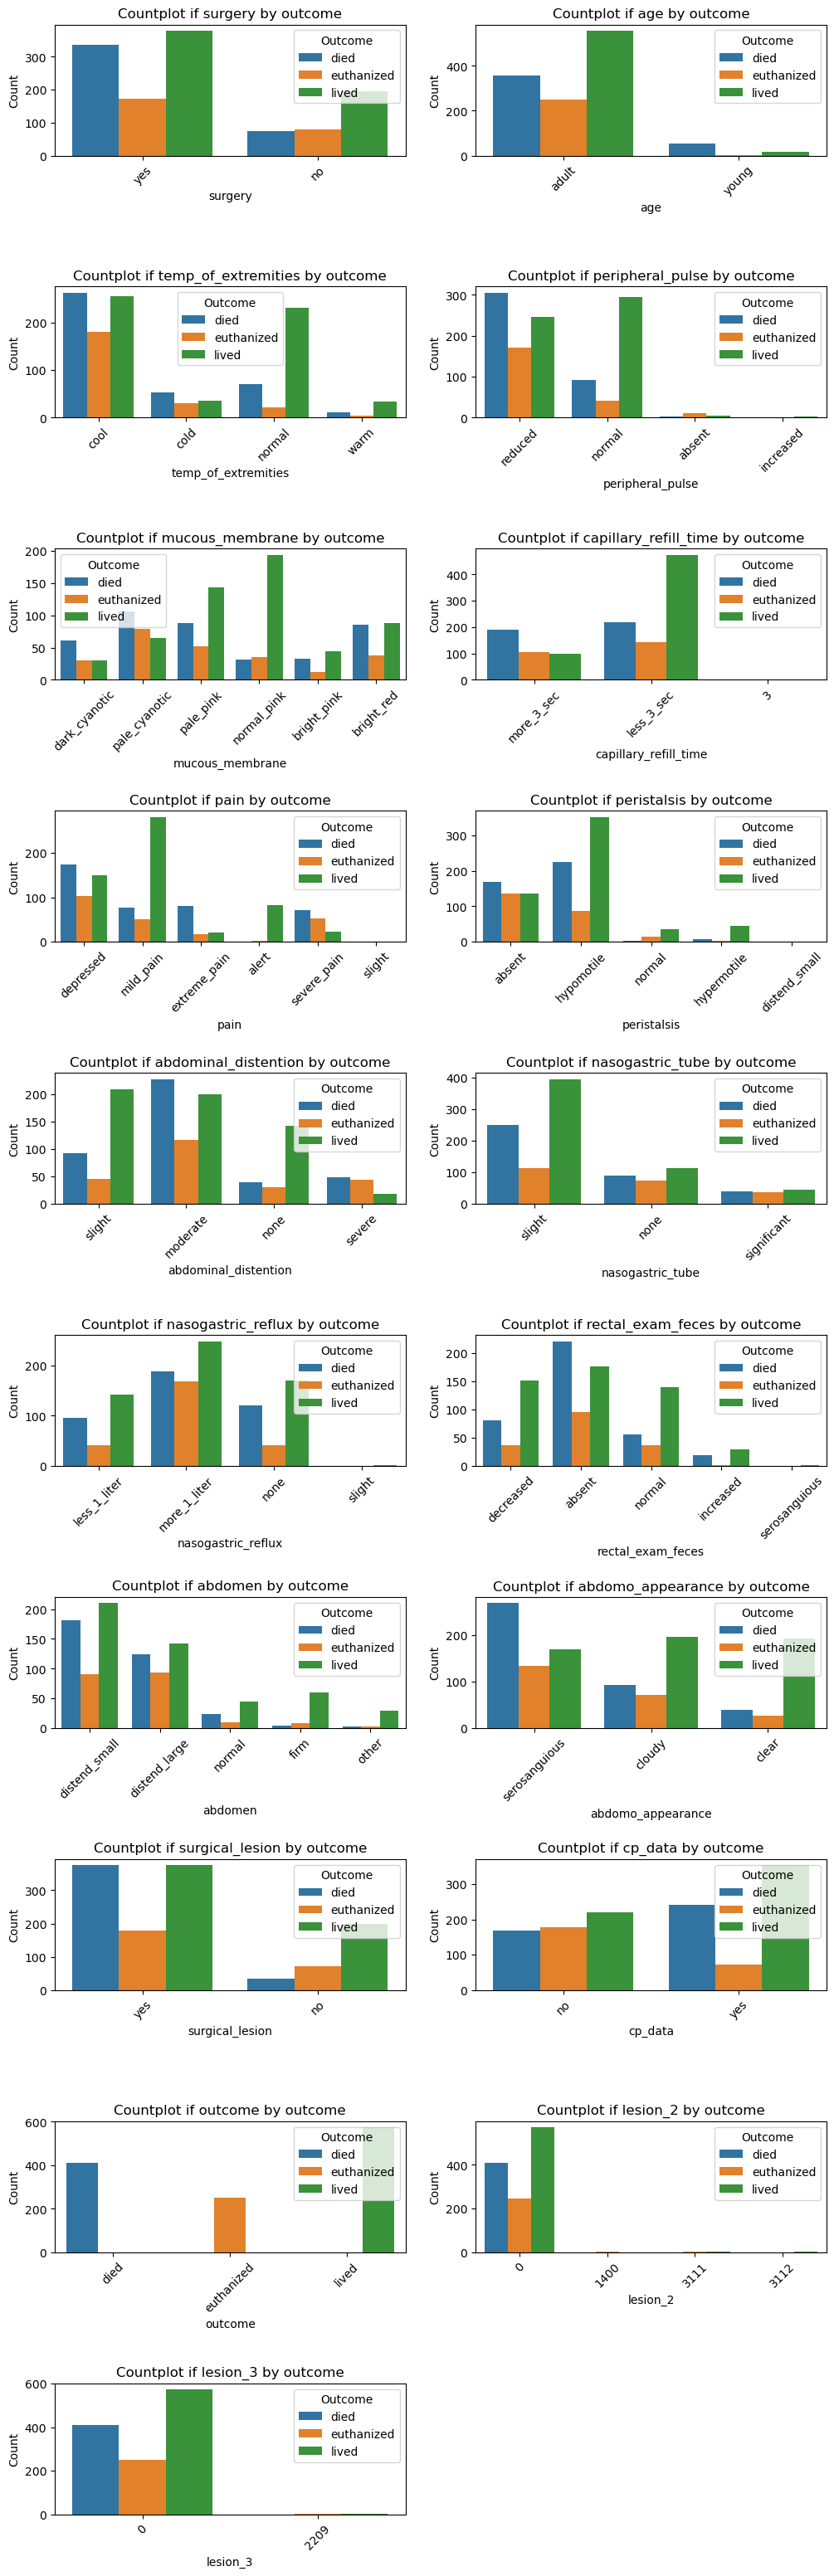

In [14]:
columns_per_row = 2
num_rows = len(categorical_columns)
if num_rows % columns_per_row != 0:
    num_rows += 1
fig, axes = plt.subplots(num_rows, columns_per_row, figsize = (12, 4 * num_rows))
fig.subplots_adjust(hspace = 1.0)
for i, column in enumerate(categorical_columns):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]
    sns.countplot(data = train_df, x = column, hue = 'outcome', ax = ax)
    ax.set_title('Countplot if {} by outcome'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis = 'x', rotation = 45)
    ax.legend(title = 'Outcome')

for i in range(len(categorical_columns), num_rows * columns_per_row):
    fig.delaxes(axes.flatten()[i])

plt.show()

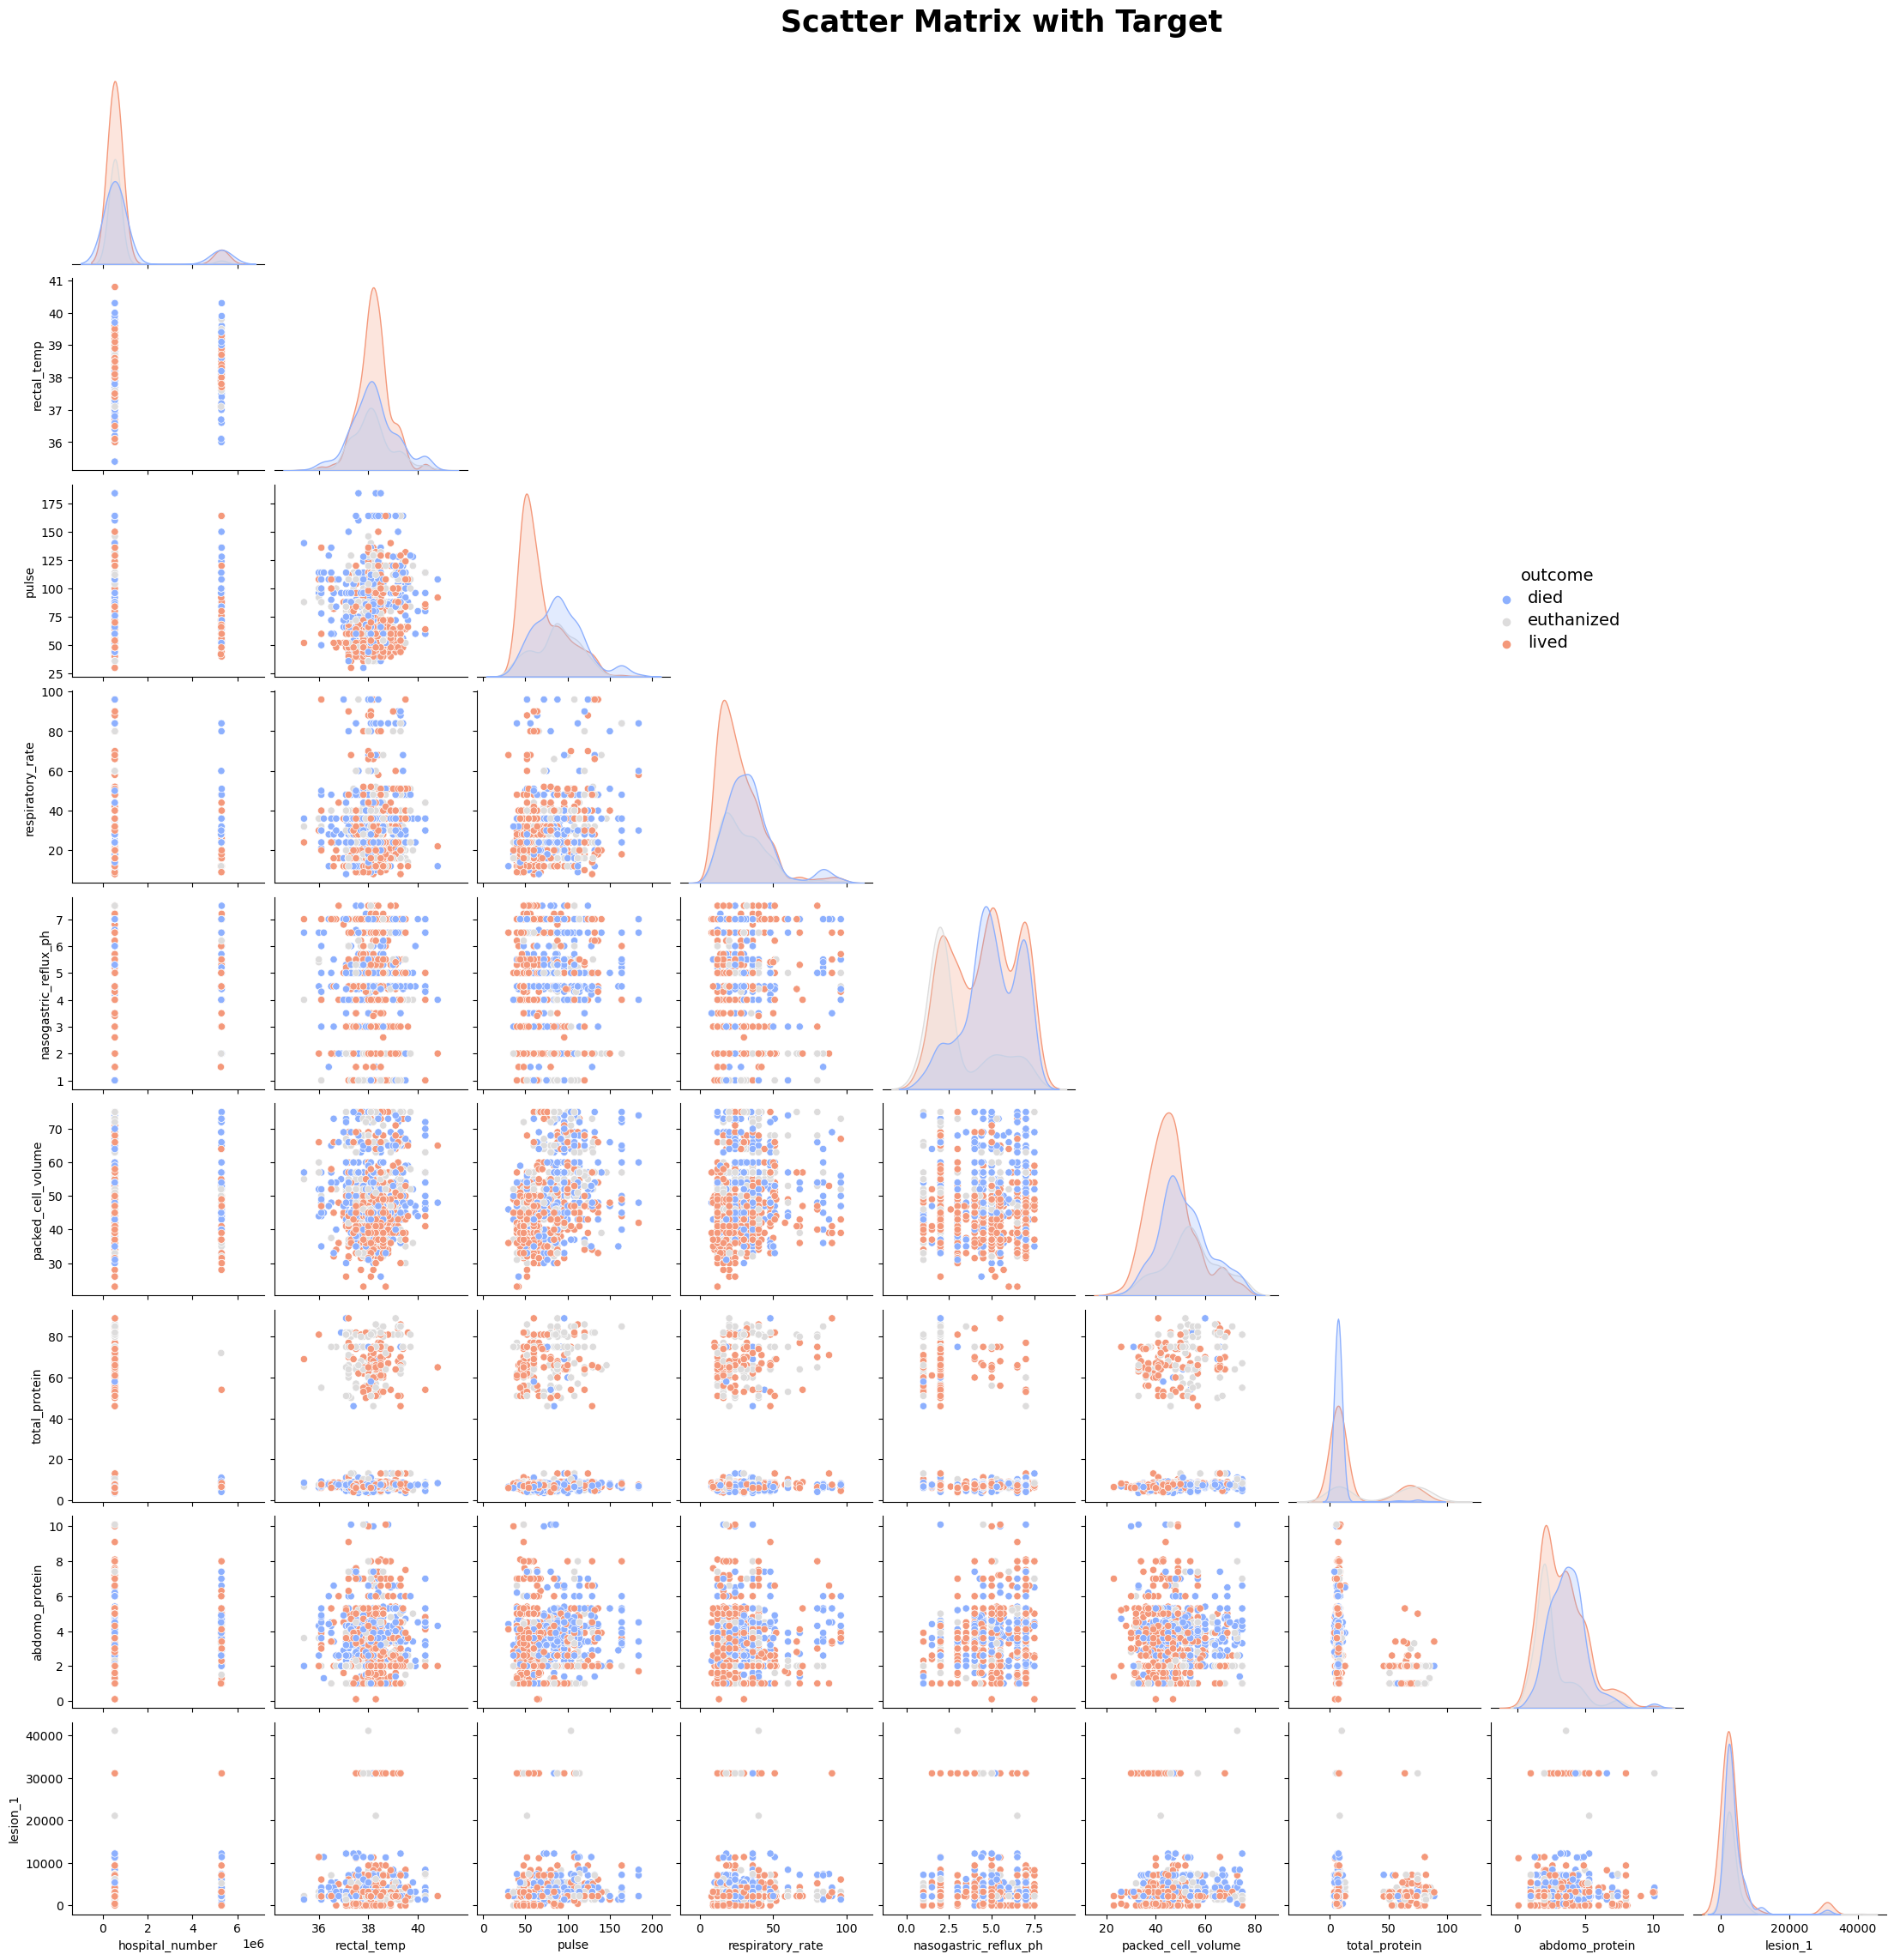

In [15]:
def plot_pair(df, num_var, target, plotname):
    g = sns.pairplot(data=df, vars=num_var, hue=target, corner=True, palette='coolwarm')
    g._legend.set_bbox_to_anchor((0.8, 0.7))
    g._legend.set_title(target)
    g._legend.loc = 'upper center'
    g._legend.get_title().set_fontsize(14)
    for item in g._legend.get_texts():
        item.set_fontsize(14)
    plt.suptitle(plotname, ha='center', fontweight='bold', fontsize=25, y=1.02)
    plt.show()

target = 'outcome'
plot_pair(train_df, numeric_columns, target, plotname='Scatter Matrix with Target')

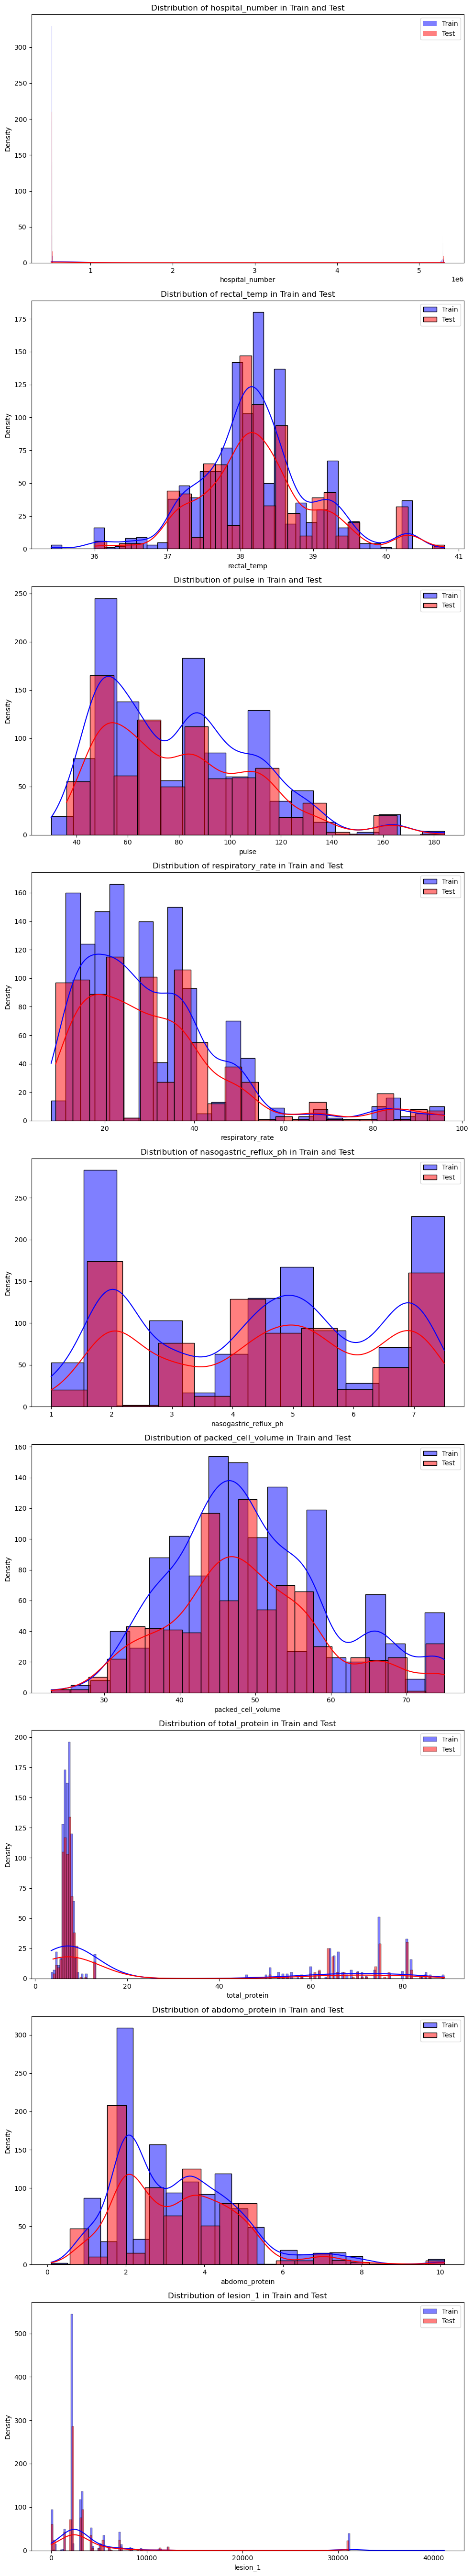

In [16]:
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 6 * len(numeric_columns)))
# Loop through numerical variables and create overlapping histograms or density plots
for i, var in enumerate(numeric_columns):
    ax = axes[i]
    
    sns.histplot(train_df[var], color='blue', kde=True, label='Train', ax=ax)
    sns.histplot(test_df[var], color='red', kde=True, label='Test', ax=ax)
    
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {var} in Train and Test')
    ax.legend()

# Adjust subplot spacing
plt.tight_layout()
plt.show()


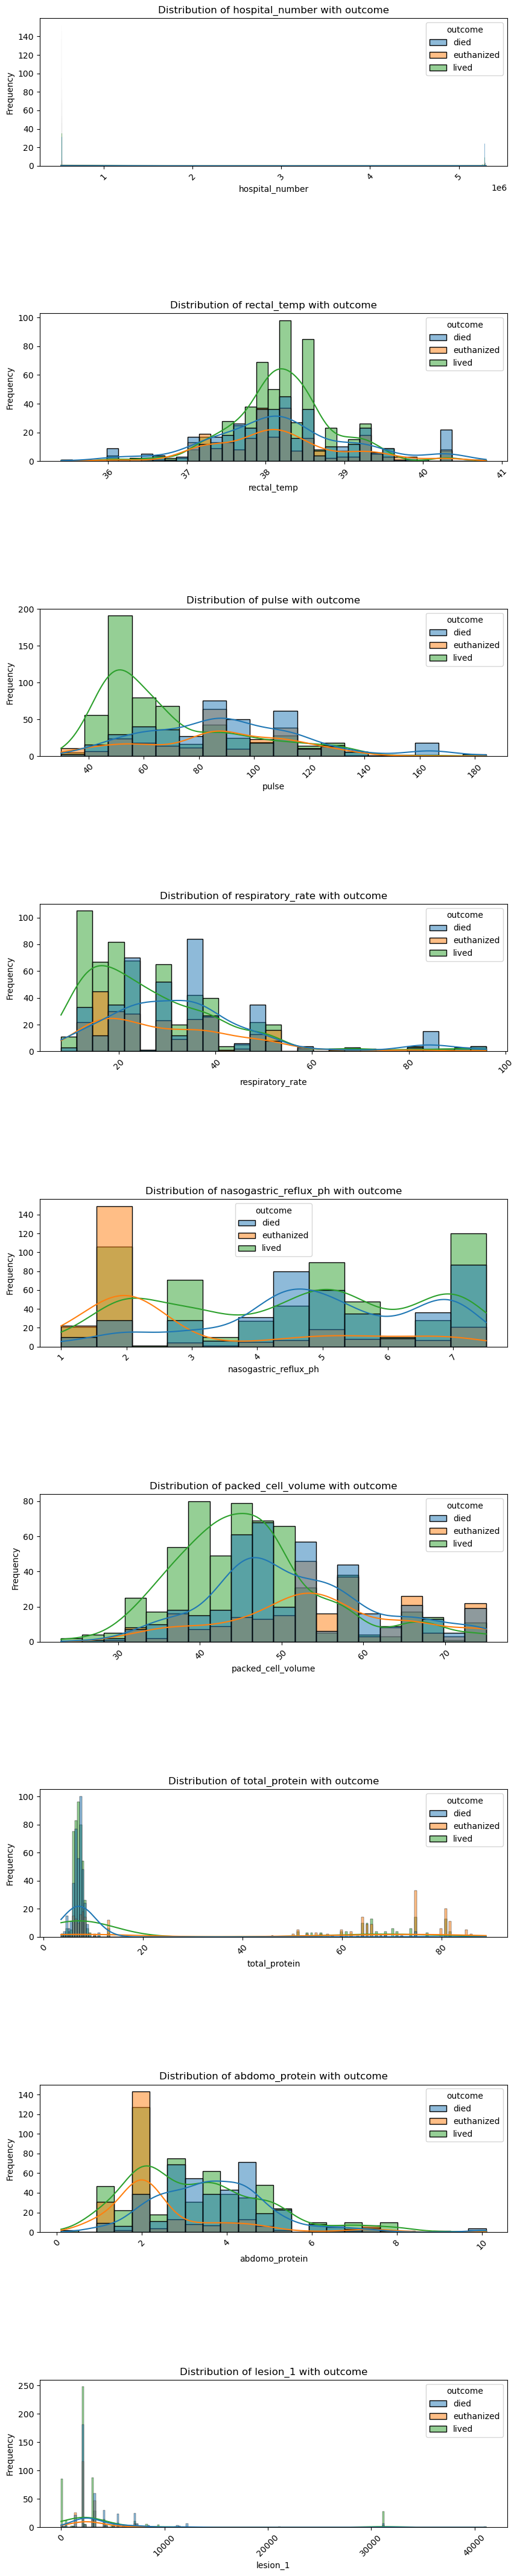

In [17]:
fig, axes = plt.subplots(len(numeric_columns), ncols = 1, figsize = (10, 6 * len(numeric_columns)))
fig.subplots_adjust(hspace = 1.0)
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.histplot(data = train_df, x = column, kde = True, hue = 'outcome', ax = ax, legend = True)
    ax.set_title('Distribution of {} with outcome'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis = 'x', rotation = 45)

plt.show()

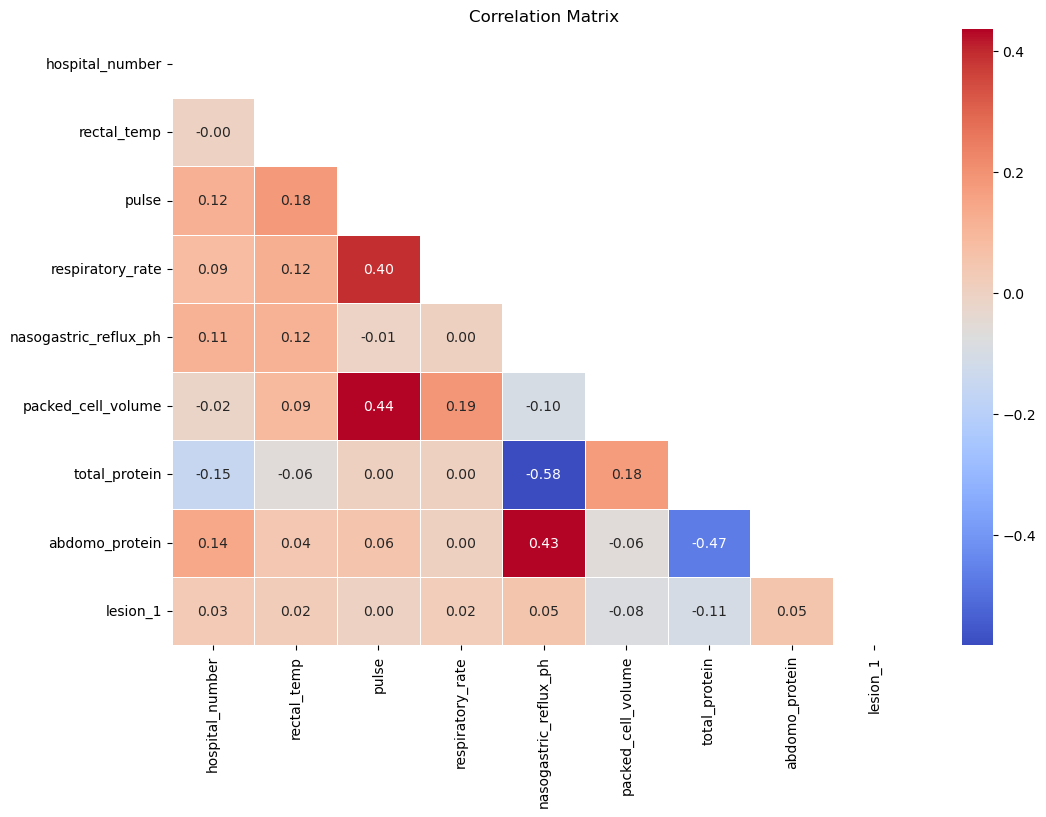

In [18]:
correlation_matrix = train_df[numeric_columns].corr()
plt.figure(figsize = (12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5, mask = mask)
plt.title('Correlation Matrix')
plt.show()

In [19]:
pd.concat([get_summary(train_df), get_summary(test_df)], axis = 'columns')

,dtypes,missing,%missing,nunique,Count,dtypes,missing,%missing,nunique,Count
surgery,object,0,0.000000,2,1235,object,0.0,0.000000,2.0,824.0
age,object,0,0.000000,2,1235,object,0.0,0.000000,2.0,824.0
hospital_number,int64,0,0.000000,255,1235,int64,0.0,0.000000,210.0,824.0
rectal_temp,float64,0,0.000000,43,1235,float64,0.0,0.000000,34.0,824.0
pulse,float64,0,0.000000,50,1235,float64,0.0,0.000000,49.0,824.0
respiratory_rate,float64,0,0.000000,37,1235,float64,0.0,0.000000,38.0,824.0
temp_of_extremities,object,39,0.031579,4,1196,object,35.0,0.042476,4.0,789.0
peripheral_pulse,object,60,0.048583,4,1175,object,47.0,0.057039,4.0,777.0
mucous_membrane,object,21,0.017004,6,1214,object,13.0,0.015777,6.0,811.0
capillary_refill_time,object,6,0.004858,3,1229,object,6.0,0.007282,3.0,818.0


In [20]:
def preprocessing_1(df):
    df['pain'] = df['pain'].replace('slight', 'moderate')
    df['peristalsis'] = df['peristalsis'].replace('distend_small', 'normal')
    df['rectal_exam_feces'] = df['rectal_exam_feces'].replace('serosanguious', 'increased')
    df['nasogastric_reflux'] = df['nasogastric_reflux'].replace('slight', 'none')
    return df
train_df = preprocessing_1(train_df)

In [21]:
cols_with_na = [col for col in train_df.columns if train_df[col].isna().sum() > 0]
cols_with_na_test = [col for col in test_df.columns if test_df[col].isna().sum() > 0]

def fill_na_with_mode_train(df):
    for col in cols_with_na:
        df[col].fillna(df[col].mode()[0], inplace = True)
    return df

def fill_na_with_mode_test(df):
    for col in cols_with_na_test:
        df[col].fillna(df[col].mode()[0], inplace = True)
    return df

train_df = fill_na_with_mode_train(train_df)
test_df = fill_na_with_mode_test(test_df)

In [22]:
le = LabelEncoder()

def preprocessing_2_train(df):
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col])
    return df

def preprocessing_2_test(df):
    for col in categorical_columns_test:
        df[col] = le.fit_transform(df[col])
    return df

train_df = preprocessing_2_train(train_df)
test_df = preprocessing_2_test(test_df)
train_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,1,0,530001,38.1,132.0,24.0,1,3,2,2,...,57.0,8.5,2,3.4,1,2209,0,0,0,0
1,1,0,533836,37.5,88.0,12.0,1,2,4,2,...,33.0,64.0,2,2.0,1,2208,0,0,0,1
2,1,0,529812,38.3,120.0,28.0,1,3,5,1,...,37.0,6.4,2,3.4,1,5124,0,0,0,2
3,1,0,5262541,37.1,72.0,30.0,0,3,5,2,...,53.0,7.0,1,3.9,1,2208,0,0,1,2
4,0,0,5299629,38.0,52.0,48.0,2,2,3,1,...,47.0,7.3,1,2.6,0,0,0,0,1,2


In [23]:
test_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,534053,38.6,40.0,20.0,2,2,3,1,...,1,42.0,7.5,0,2.3,0,0,0,0,0
1,1,0,528469,38.2,112.0,48.0,1,3,0,2,...,1,44.0,6.0,2,2.6,0,2208,0,0,1
2,1,0,528178,37.7,66.0,12.0,1,2,1,1,...,1,31.5,6.0,1,1.6,1,2205,0,0,1
3,0,0,534784,37.1,88.0,20.0,1,3,4,1,...,0,75.0,81.0,2,1.0,1,1400,0,0,0
4,1,0,529840,38.3,50.0,12.0,1,2,0,1,...,1,37.0,6.8,1,2.6,1,2208,0,0,1


In [24]:
from scipy.stats import chi2_contingency
chi_square_results = pd.DataFrame(columns = ['Feature', 'chi-square', 'p-value'])
significance_level = 0.05

RED = "\033[91m"
RESET = "\033[0m"
def chi_square_test(df, target):
    for feature in df.columns:
        if feature != target:
            contingency_table = pd.crosstab(df[feature], df[target])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            chi_square_results.append({
                'Feature': feature,
                'chi-square': chi2,
                'p-value': p
            }, ignore_index = True)
            if p < significance_level:
                print('{} has a significant relationship with the target variable'.format(feature))
            else:
                 print(RED + '{} does not have a significant relationship with the target variable'.format(feature) + RESET)

target = 'outcome'
chi_square_test(train_df, target)

surgery has a significant relationship with the target variable
age has a significant relationship with the target variable
hospital_number has a significant relationship with the target variable
rectal_temp has a significant relationship with the target variable
pulse has a significant relationship with the target variable
respiratory_rate has a significant relationship with the target variable
temp_of_extremities has a significant relationship with the target variable
peripheral_pulse has a significant relationship with the target variable
mucous_membrane has a significant relationship with the target variable
capillary_refill_time has a significant relationship with the target variable
pain has a significant relationship with the target variable
peristalsis has a significant relationship with the target variable
abdominal_distention has a significant relationship with the target variable
nasogastric_tube has a significant relationship with the target variable
nasogastric_reflux has 

In [25]:
train_df.drop(columns = ['lesion_3'], inplace = True)
test_df.drop(columns = ['lesion_3'], inplace = True)

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

X = train_df.drop(columns = 'outcome')
y = train_df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

f1_scores = {}
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average = "micro")
    f1_scores[name] = f1

for name, score in f1_scores.items():
    print(f"{name}: {score}")

Logistic Regression: 0.42914979757085014
Random Forest: 0.7125506072874493
Gradient Boosting: 0.708502024291498
SVM: 0.4898785425101215
Naive Bayes: 0.5546558704453441
K-Nearest Neighbors: 0.6032388663967612


In [27]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Create a LightGBM classifier with a verbose setting of -1 to suppress warnings
lgbm_classifier = lgb.LGBMClassifier(verbose=-1)

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [5, 7, 9]
}

grid_search = GridSearchCV(estimator=lgbm_classifier, param_grid=param_grid, cv=5, scoring="f1_micro")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average="micro")
print(f"Best hyperparameters: {best_params}")
print(f"Micro average score on test data: {f1:.4f}")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Micro average score on test data: 0.6883


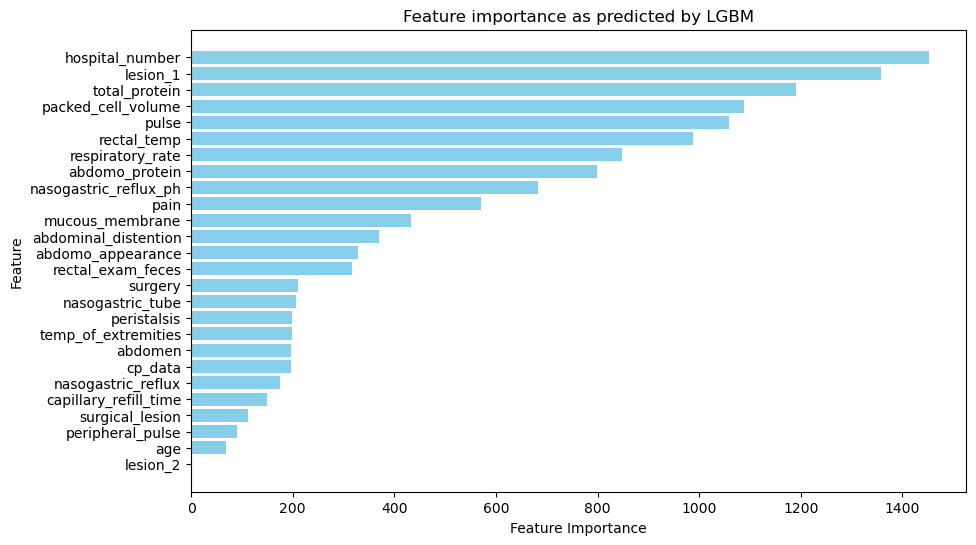

In [28]:
model = lgb.LGBMClassifier(**best_params, verbose = -1)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
feature_columns = train_df.drop(columns = 'outcome').columns
importance_df = pd.DataFrame({
    "Feature": feature_columns,
    "Importance": feature_importances
})
importance_df = importance_df.sort_values(by = "Importance", ascending = False)
plt.figure(figsize = (10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color = "skyblue")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature importance as predicted by LGBM')
plt.gca().invert_yaxis()

In [29]:
train_df.drop(columns = 'lesion_2', inplace = True)
test_df.drop(columns = 'lesion_2', inplace = True)

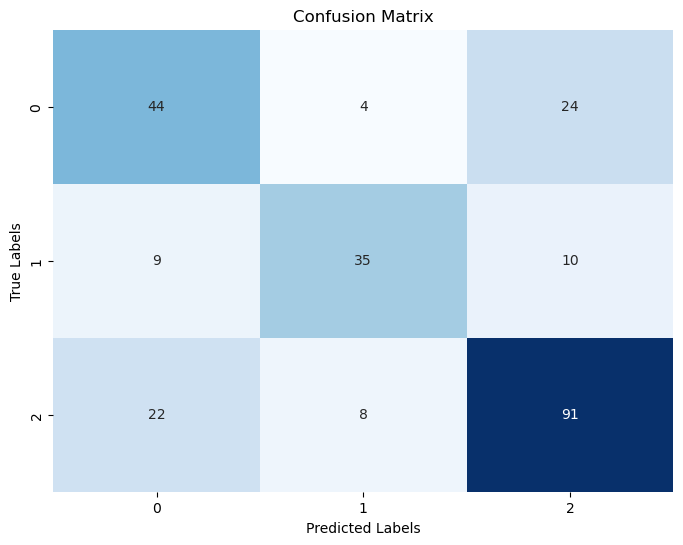

In [30]:
from sklearn.metrics import confusion_matrix

X = train_df.drop(columns = 'outcome')
y = train_df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
model.fit(X, y)
predicted_values = model.predict(test_df)
predicted_df = pd.DataFrame({
    'id': test_id,
    'outcome': predicted_values
})
predicted_df['outcome'].replace({
    0: 'died',
    1: 'euthanized',
    2: 'lived'
}, inplace = True)
predicted_df.to_csv('predictions.csv', index = False)